INSTALLATION

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

# print(list(dataset_path.glob('*.csv')))
        

c:\Users\Daulet\anaconda3\envs\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Daulet\.cache\kagglehub\datasets\arjunbhasin2013\ccdata\versions\1


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer


import scipy

In [4]:
import os

file_path = os.path.join(path, "CC GENERAL.csv")
df = pd.read_csv(file_path)


print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

-> core features:
BALANCE
PURCHASES
'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'

-> credit usage:
'CREDIT_LIMIT', 

-> payment behavior:
'PAYMENTS'


------PREPROCESSING------

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


based on the std df has outliers + features are not normalized

In [7]:
df.isnull().sum().sort_values(ascending =False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [9]:
df.isnull().sum().sort_values(ascending =False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [10]:

# plt.figure(figsize=(15, 10))
# df[numerical_cols].boxplot()
# plt.xticks(rotation=45)

# plt.show()

# fig, axes = plt.subplots(4, 4, figsize=(20, 15))
# axes = axes.ravel()

# for i, col in enumerate(numerical_cols[:16]):  
#     df[col].hist(bins=50, ax=axes[i])
#     axes[i].set_title(f'{col} Distribution')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [11]:
numerical_cols = df.select_dtypes(include= [np.number]).columns
categorical_cols = df.select_dtypes(exclude= [np.number]).columns

print(f"numerical columns: {numerical_cols}")
print(f"categorical columns: {categorical_cols}")

df_fixed= df.drop(categorical_cols, axis=1)


imputer=SimpleImputer(strategy='median')
df_fixed_arr=imputer.fit_transform(df_fixed)
df_fixed = pd.DataFrame(df_fixed_arr, columns=df_fixed.columns)


print(f"Final shape: {df_fixed.shape}")
print(f"Missing values after imputation: {df_fixed.isnull().sum().sum()}")
print(f"Final columns: {list(df_fixed.columns)}")

numerical columns: Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
categorical columns: Index(['CUST_ID'], dtype='object')
Final shape: (8950, 17)
Missing values after imputation: 0
Final columns: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [12]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_fixed) 
x_scaled = pd.DataFrame(scaled_data, columns=df_fixed.columns)


In [13]:
inertia =[]

K=range(1,30)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    
    print(f"k={k} -> inertia = {kmeans.inertia_:.2f}")

k=1 -> inertia = 152150.00
k=2 -> inertia = 127785.33
k=3 -> inertia = 112609.90
k=4 -> inertia = 99074.25
k=5 -> inertia = 91503.39
k=6 -> inertia = 88647.69
k=7 -> inertia = 79753.55
k=8 -> inertia = 76248.17
k=9 -> inertia = 71386.84
k=10 -> inertia = 70603.28
k=11 -> inertia = 69463.74
k=12 -> inertia = 61381.16
k=13 -> inertia = 59153.81
k=14 -> inertia = 57491.52
k=15 -> inertia = 55924.77
k=16 -> inertia = 55130.27
k=17 -> inertia = 53415.40
k=18 -> inertia = 52299.67
k=19 -> inertia = 51116.27
k=20 -> inertia = 50682.19
k=21 -> inertia = 49329.82
k=22 -> inertia = 47751.51
k=23 -> inertia = 47804.27
k=24 -> inertia = 47151.12
k=25 -> inertia = 46492.81
k=26 -> inertia = 44732.08
k=27 -> inertia = 44537.10
k=28 -> inertia = 43116.90
k=29 -> inertia = 42414.93


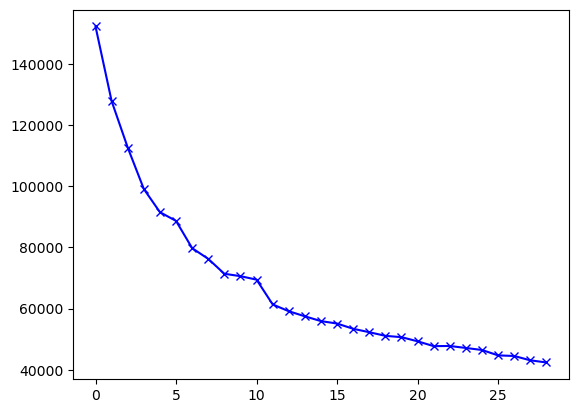

In [14]:
plt.plot(inertia, 'bx-')


In [15]:

def evaluate_clusters(x_scaled, max_k=10):
    
    inertia_scores = []
    silhouette_scores = []
    
    for k in range(2, max_k + 1):  
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(x_scaled)
        
        inertia_scores.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(x_scaled, labels))
        
        print(f"k={k}: inertia = {kmeans.inertia_:.2f}, silhouette = {silhouette_scores[-1]:.3f}")
    
    return inertia_scores, silhouette_scores

inertia_scores, silhouette_scores = evaluate_clusters(x_scaled)

k=2: inertia = 127785.01, silhouette = 0.210
k=3: inertia = 111986.70, silhouette = 0.251
k=4: inertia = 99073.94, silhouette = 0.198
k=5: inertia = 91502.98, silhouette = 0.193
k=6: inertia = 84852.52, silhouette = 0.203
k=7: inertia = 79532.33, silhouette = 0.215
k=8: inertia = 76050.70, silhouette = 0.208
k=9: inertia = 71087.27, silhouette = 0.215
k=10: inertia = 66612.69, silhouette = 0.221


In [16]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(x_scaled)
labels = kmeans.labels_

clusters = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [19]:
pca = PCA(n_components = 2 )
x_pca = pca.fit(x_scaled)

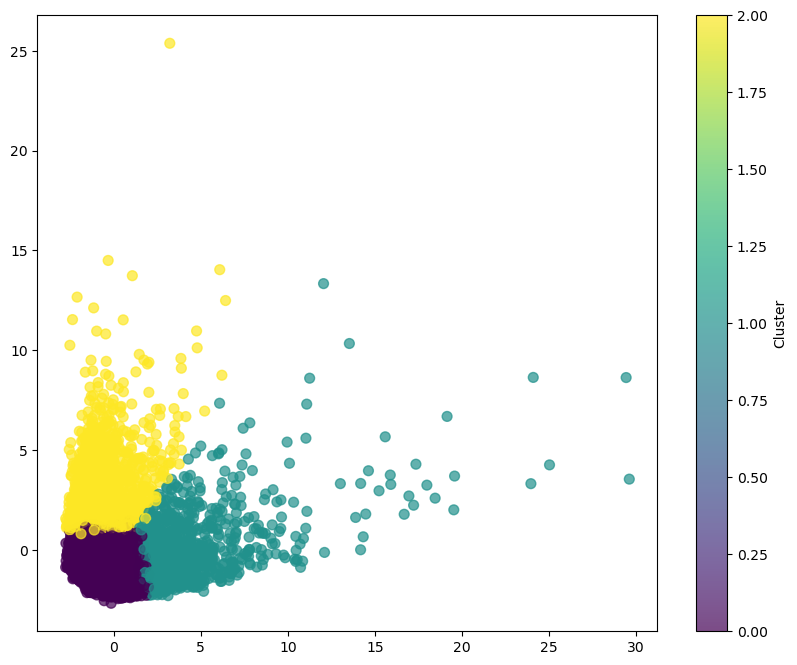

In [25]:
plt.figure(figsize=(10, 8))

pca = PCA(n_components=2)
x_pca_transformed = pca.fit_transform(x_scaled)

plt.scatter(x_pca_transformed[:, 0], x_pca_transformed[:, 1], 
           c=labels,    
           cmap='viridis', 
           s=50, 
           alpha=0.7)



plt.colorbar(label='Cluster')
plt.show()

In [29]:
final_results = df_fixed.groupby(labels).mean()
final_results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,799.771040,0.835184,505.615025,253.161504,252.774371,329.805632,0.465148,0.132355,0.345201,0.068257,1.209709,8.655280,3270.246492,909.825781,548.594759,0.155775,11.479568
1,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1224.538588,0.298632,11.923077
2,3987.067263,0.957917,384.287495,248.562392,135.802542,3867.874441,0.232145,0.110873,0.144152,0.447165,12.390733,5.608641,6679.088632,3017.218082,1794.640365,0.033753,11.348153


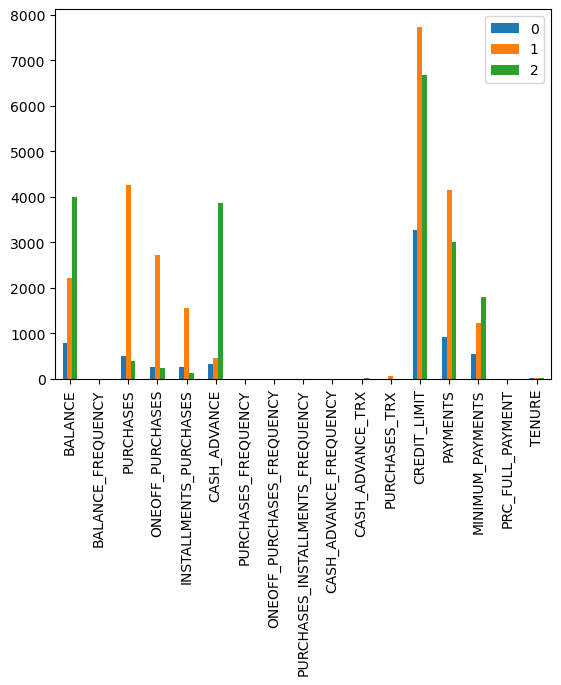

In [32]:
final_results.T.plot(kind='bar')
plt.show()

cluster 0 -> ordinary low usage customers
infrequent users and basic spendings with minimal purchases

cluster 1 -> high value frequent users
heavy purchases and good payment behavior

cluster 2 -> credit dependents (Risk Zone)
high balences and poor payment behavior

In [36]:
import joblib
# Сохраняем модель
joblib.dump(kmeans, 'kmeans_model.joblib')
# Сохраняем скейлер
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']